In [10]:

import sys
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [11]:

df_poet = pd.read_csv("poet.log", delimiter=" ",
                      skipinitialspace=True).groupby("HB_NUM").first()
df_heartbeats = pd.read_csv(
    "heartbeat.log", delimiter=" ", skipinitialspace=True, index_col="Beat")
df_poet

,HB_RATE,X_HAT_MINUS,X_HAT,P_MINUS,H,K,P,SPEEDUP,ERROR,WORKLOAD,LOWER_ID,UPPER_ID,NUM_HBS
HB_NUM,,,,,,,,,,,,,
90000,154.973648,0.200000,0.200000,1.000010,0.000000,0.000000,1.000010,4.487371,195.026352,5.000000,0,3,0
190000,86.128883,0.200000,19.184190,1.000020,4.487371,0.222737,0.000496,4.487371,263.871117,0.052126,0,3,0
290000,124.214577,19.184190,23.473871,0.000506,4.487371,0.112507,0.000251,4.487371,225.785423,0.042601,0,3,0
390000,126.514687,23.473871,25.098658,0.000261,4.487371,0.076718,0.000171,4.487371,223.485313,0.039843,0,3,0
490000,125.744446,25.098658,25.879374,0.000181,4.487371,0.059517,0.000133,4.487371,224.255554,0.038641,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210070000,189.516602,55.930427,54.085005,0.000077,4.487371,0.030024,0.000067,4.487371,160.483398,0.018489,0,3,0
210170000,190.513565,54.085005,52.525492,0.000077,4.487371,0.029884,0.000067,4.487371,159.486435,0.019038,0,3,0
210270000,191.790207,52.525492,51.217893,0.000077,4.487371,0.029778,0.000066,4.487371,158.209793,0.019524,0,3,0


In [12]:
df_hb_mean = df_heartbeats.groupby("Tag").mean()
df_hb_mean

,Timestamp,Global_Rate,Window_Rate,Instant_Rate,Global_Accuracy,Window_Accuracy,Instant_Accuracy,Global_Power,Window_Power,Instant_Power
Tag,,,,,,,,,,
0,1.637277e+18,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000,0.000000
10000,1.637277e+18,323.647586,161.823792,161.823793,1.0,1.0,1.0,11.318974,11.318974,11.318974
20000,1.637277e+18,243.952142,162.634766,163.453899,1.0,1.0,1.0,11.241691,11.241691,11.163630
30000,1.637277e+18,216.347276,162.260452,161.516993,1.0,1.0,1.0,11.682938,11.682938,12.559366
40000,1.637277e+18,201.304591,161.043671,157.500406,1.0,1.0,1.0,12.728977,12.728977,15.775035
...,...,...,...,...,...,...,...,...,...,...
210500000,1.637277e+18,243.328162,191.861938,190.878271,1.0,1.0,1.0,15.572353,10.114207,9.471682
210510000,1.637277e+18,243.325177,191.651398,191.799130,1.0,1.0,1.0,15.571997,10.068015,9.435431
210520000,1.637277e+18,243.322234,191.607162,192.378243,1.0,1.0,1.0,15.571650,10.018912,9.569596


In [13]:

df = df_poet.join(df_hb_mean)
df["Timestamp"] = pd.to_datetime(df["Timestamp"] -df["Timestamp"].iloc[0])
df = df.iloc[5:]
df

,HB_RATE,X_HAT_MINUS,X_HAT,P_MINUS,H,K,P,SPEEDUP,ERROR,WORKLOAD,...,Timestamp,Global_Rate,Window_Rate,Instant_Rate,Global_Accuracy,Window_Accuracy,Instant_Accuracy,Global_Power,Window_Power,Instant_Power
HB_NUM,,,,,,,,,,,,,,,,,,,,,
590000,124.682091,25.879374,26.304596,0.000143,4.487371,0.049723,0.000111,4.487371,225.317909,0.038016,...,1970-01-01 00:00:00.435383552,121.590926,124.682091,116.072084,1.0,1.0,1.0,10.270861,9.726329,8.891020
690000,116.864777,26.304596,26.253418,0.000121,4.487371,0.043604,0.000097,4.487371,233.135223,0.038090,...,1970-01-01 00:00:00.520952576,120.892493,116.864777,117.523079,1.0,1.0,1.0,10.189974,9.723515,10.200062
790000,116.232147,26.253418,26.191052,0.000107,4.487371,0.039555,0.000088,4.487371,233.767853,0.038181,...,1970-01-01 00:00:00.606987264,120.289615,116.232147,117.825835,1.0,1.0,1.0,10.143012,9.826951,10.478042
890000,117.402740,26.191052,26.186410,0.000098,4.487371,0.036774,0.000082,4.487371,232.597260,0.038188,...,1970-01-01 00:00:00.692164096,119.961859,117.402740,119.355314,1.0,1.0,1.0,10.117226,9.915888,9.397483
990000,119.800987,26.186410,26.266237,0.000092,4.487371,0.034815,0.000078,4.487371,230.199013,0.038072,...,1970-01-01 00:00:00.775635968,119.945752,119.800987,122.511455,1.0,1.0,1.0,10.090261,9.847899,10.745176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210070000,189.516602,55.930427,54.085005,0.000077,4.487371,0.030024,0.000067,4.487371,160.483398,0.018489,...,1970-01-01 00:01:29.703536384,243.455970,189.516602,189.344523,1.0,1.0,1.0,15.585744,10.592062,9.915625
210170000,190.513565,54.085005,52.525492,0.000077,4.487371,0.029884,0.000067,4.487371,159.486435,0.019038,...,1970-01-01 00:01:29.756026112,243.425029,190.513565,194.027409,1.0,1.0,1.0,15.582772,10.501270,9.687159
210270000,191.790207,52.525492,51.217893,0.000077,4.487371,0.029778,0.000066,4.487371,158.209793,0.019524,...,1970-01-01 00:01:29.808166400,243.395071,191.790207,193.251914,1.0,1.0,1.0,15.579672,10.239190,9.837164


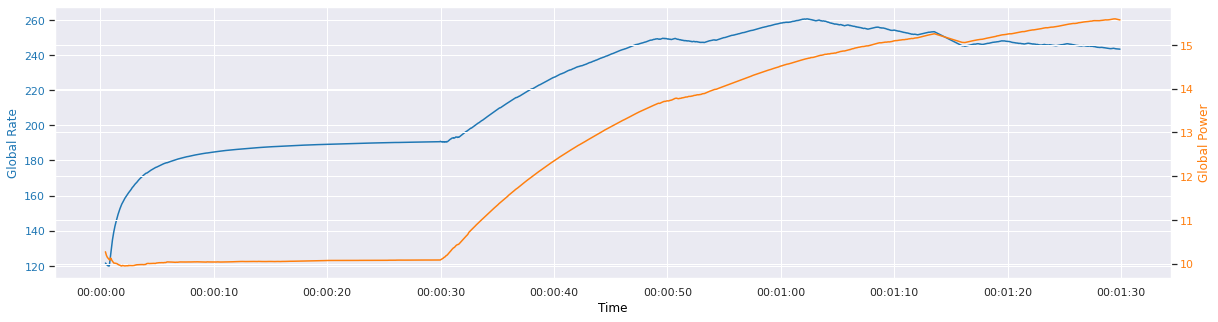

In [14]:
fig, ax1 = plt.subplots(figsize=(20, 5)) 
# plt.plot(df["HB_NUM"], df["HB_RATE"], label="latency")

# plt.plot(df["HB_NUM"], [350]*len(df["HB_NUM"]), label="target")
# plt.plot(df_poet["HB_NUM"].iloc[1:], df_poet["WORKLOAD"].iloc[1:], label="target")
# plt.plot(df.index, df["Global_Power"],label="global")
ax1.plot(df["Timestamp"], df["Global_Rate"],label="Global_Rate",color="tab:blue")
ax1.tick_params(axis ='y', labelcolor = "tab:blue") 
ax1.set_ylabel('Global Rate', color = "tab:blue") 
ax1.set_xlabel('Time', color = "black") 

ax2 = ax1.twinx() 
ax2.plot(df["Timestamp"], df["Global_Power"],label="Global_Power",color="tab:orange")
ax2.tick_params(axis ='y', labelcolor = "tab:orange") 
ax2.set_ylabel('Global Power', color = "tab:orange") 

fig.savefig("test.png")

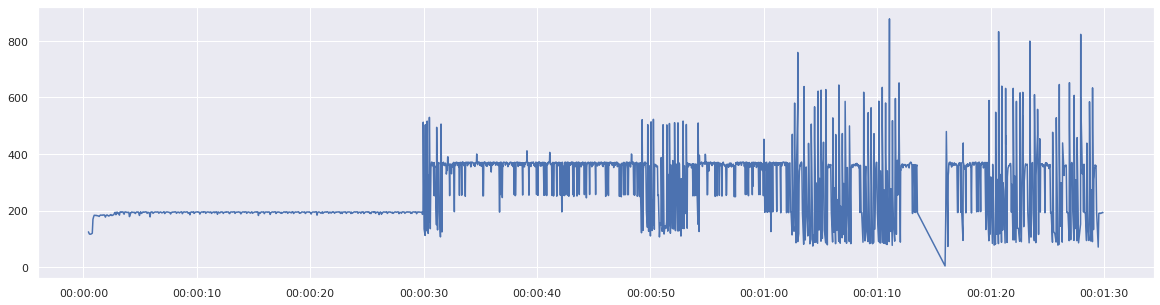

In [15]:
fig, ax1 = plt.subplots(figsize=(20, 5)) 
plt.plot(df["Timestamp"], df["HB_RATE"], label="SPEEDUP")